In [34]:
import pandas as pd


In [35]:
df_raw = pd.read_excel("GPA Dataset (Let's get spicy) (Responses).xlsx")

In [36]:
# removing outliers from average screen time columns
df_raw = df_raw[df_raw["What is your average screentime?"] < 50]

In [37]:
# removing the data saying started programming at the age 1
df_raw = df_raw[df_raw["At what age did you start programming?"] > 2]

In [38]:
df_raw.head(5)

,Timestamp,What state are you from?,Major (Check all that apply),At what age did you start programming?,Have you at any point attended private school?,Do you have a scholarship?,Do you have a parent in tech?,Do you study with friends?,Do you take notes in classes?,How many credits did you take last semester?,What is your average screentime?,What is your average daily time on Tik Tok or Tik Tok equivalents?,How many hours of sleep do you get a night?,What was your GPA LAST SEMESTER?,What was your GPA THE SEMESTER BEFORE THAT?
0,2024-11-05 14:57:00.136,NJ,Computer Science,14.0,No,NaN,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.78,2.6
1,2024-11-05 14:57:33.024,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.90,3.7
2,2024-11-05 14:57:41.459,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.90,4.0
3,2024-11-05 14:57:49.880,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.00,4.0
4,2024-11-05 14:57:54.429,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.00,4.0


In [39]:
df_raw.shape

(65, 15)

In [40]:
df_raw["Do you study with friends?"].value_counts()

Do you study with friends?
Sometimes     38
Never         15
Frequently    12
Name: count, dtype: int64

<Axes: >

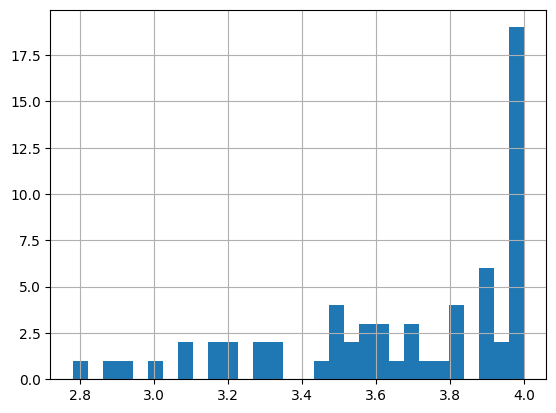

In [41]:
df_raw["What was your GPA LAST SEMESTER?"].hist(bins=30)

<Axes: >

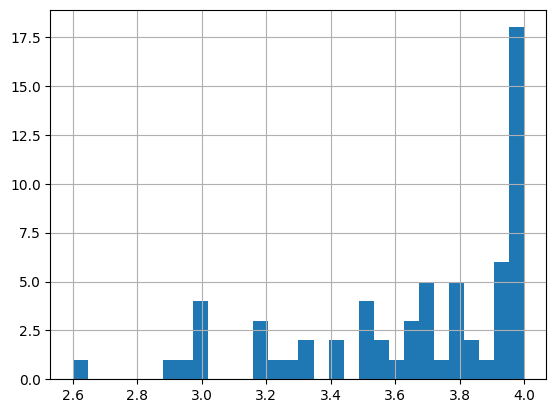

In [42]:
df_raw["What was your GPA THE SEMESTER BEFORE THAT?"].hist(bins=30)

In [43]:
df_raw["What was your GPA LAST SEMESTER?"].mean()

3.662703125

In [44]:
df_raw["What was your GPA THE SEMESTER BEFORE THAT?"].mean()

3.65384375

In [45]:
df_raw["What was your GPA LAST SEMESTER?"].describe()

count    64.000000
mean      3.662703
std       0.341774
min       2.780000
25%       3.489250
50%       3.753000
75%       3.985000
max       4.000000
Name: What was your GPA LAST SEMESTER?, dtype: float64

In [46]:
df_raw["What was your GPA THE SEMESTER BEFORE THAT?"].describe()

count    64.000000
mean      3.653844
std       0.361078
min       2.600000
25%       3.475000
50%       3.782000
75%       3.962750
max       4.000000
Name: What was your GPA THE SEMESTER BEFORE THAT?, dtype: float64

In [47]:
df_raw["What is your average daily time on Tik Tok or Tik Tok equivalents?"].corr(df_raw["How many hours of sleep do you get a night?"])

-0.13819423101631934

In [48]:
df_raw["How many credits did you take last semester?"].corr(df_raw["What was your GPA LAST SEMESTER?"])

0.241220211039036

In [49]:
df_raw.columns

Index(['Timestamp', 'What state are you from?', 'Major (Check all that apply)',
       'At what age did you start programming?',
       'Have you at any point attended private school?',
       'Do you have a scholarship?', 'Do you have a parent in tech?',
       'Do you study with friends?', 'Do you take notes in classes?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?'],
      dtype='object')

In [50]:
df_raw_num = df_raw[['At what age did you start programming?','How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?']]

In [51]:
corr_mat_1 = df_raw_num.corr()

<Axes: >

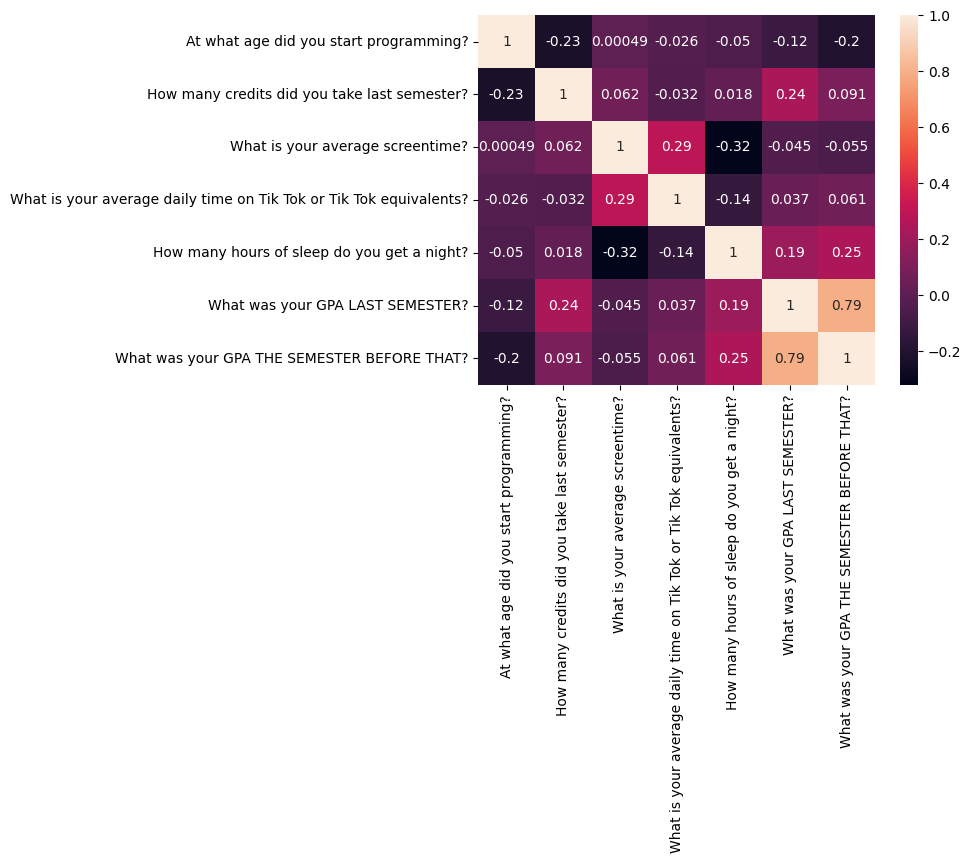

In [52]:
import seaborn as sns
sns.heatmap(corr_mat_1, annot=True)

hours spend on tiktok are highly correlated to screentime that tells us most of there screentime is cause of apps like tiktok

In [ ]:
df_raw["Do you take notes in classes?"].value_counts()

Do you take notes in classes?
Yes, on paper         30
Yes, on a tablet      15
Yes, on a computer    13
No                     7
Name: count, dtype: int64

most students make notes on either tablet or paper that means most prefer to write them rather type

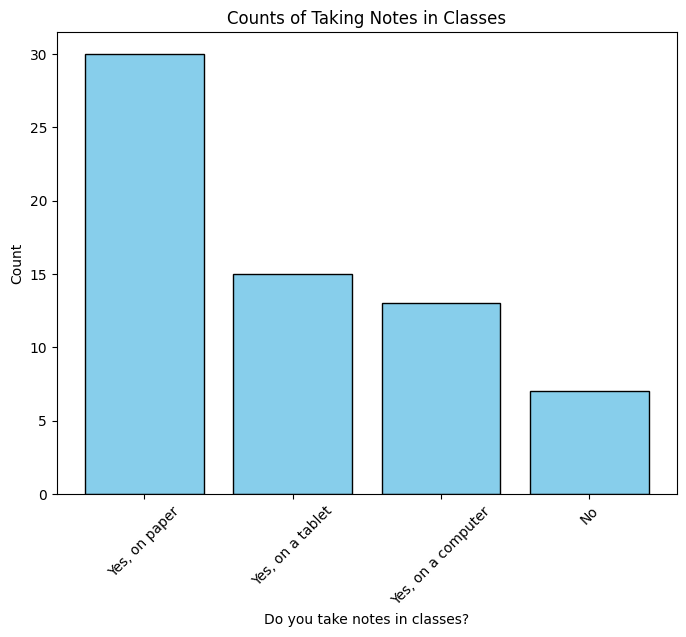

In [67]:


import matplotlib.pyplot as plt

# Calculate value counts
note_counts = df_raw["Do you take notes in classes?"].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(note_counts.index.astype(str), note_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Do you take notes in classes?')
plt.ylabel('Count')
plt.title('Counts of Taking Notes in Classes')
plt.xticks(rotation=45)  # Rotate x-ticks if necessary
plt.show()

In [54]:
df_raw["Have you at any point attended private school?"].value_counts()

Have you at any point attended private school?
No     50
Yes    15
Name: count, dtype: int64

In [55]:
df_raw["Do you have a scholarship?"].unique()

array([nan, 'Partial', 'Full'], dtype=object)

In [56]:
df_raw["Do you have a scholarship?"] = df_raw["Do you have a scholarship?"].fillna("no")

In [57]:
df_raw["Do you have a scholarship?"].value_counts()

Do you have a scholarship?
no         40
Partial    22
Full        3
Name: count, dtype: int64

In [58]:
cross_tab_1 = pd.crosstab(df_raw["Do you have a scholarship?"], df_raw["Have you at any point attended private school?"])

In [59]:
cross_tab_1

Have you at any point attended private school?,No,Yes
Do you have a scholarship?,,
Full,3,0
Partial,20,2
no,27,13


In [68]:
cross_tab_2 = pd.crosstab(df_raw["Do you study with friends?"], df_raw["Have you at any point attended private school?"])

In [69]:
cross_tab_2

Have you at any point attended private school?,No,Yes
Do you study with friends?,,
Frequently,12,0
Never,11,4
Sometimes,27,11


In [71]:
cross_tab_2 = pd.crosstab(df_raw["Do you study with friends?"], df_raw["Do you take notes in classes?"])

In [72]:
cross_tab_2

Do you take notes in classes?,No,"Yes, on a computer","Yes, on a tablet","Yes, on paper"
Do you study with friends?,,,,
Frequently,1,3,2,6
Never,2,5,3,5
Sometimes,4,5,10,19


In [73]:
df_raw["Do you take notes in classes?"].value_counts()

Do you take notes in classes?
Yes, on paper         30
Yes, on a tablet      15
Yes, on a computer    13
No                     7
Name: count, dtype: int64

In [74]:
df_raw["Do you study with friends?"].value_counts()

Do you study with friends?
Sometimes     38
Never         15
Frequently    12
Name: count, dtype: int64

In [62]:
df_raw.columns

Index(['Timestamp', 'What state are you from?', 'Major (Check all that apply)',
       'At what age did you start programming?',
       'Have you at any point attended private school?',
       'Do you have a scholarship?', 'Do you have a parent in tech?',
       'Do you study with friends?', 'Do you take notes in classes?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?'],
      dtype='object')

In [75]:
df_raw["Timestamp"][0]

Timestamp('2024-11-05 14:57:00.136000')

<Axes: xlabel='What was your GPA LAST SEMESTER?', ylabel='Count'>

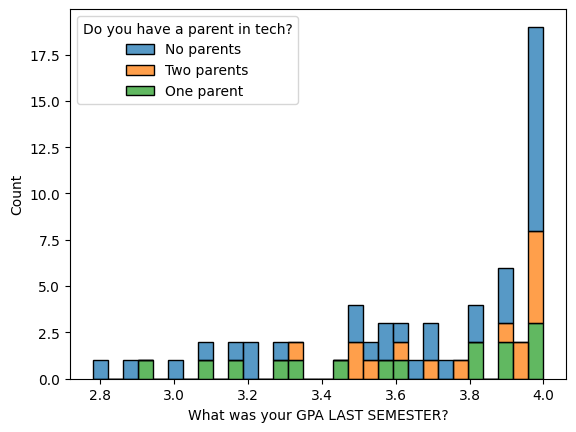

In [63]:
import seaborn as sns
sns.histplot(data=df_raw, x="What was your GPA LAST SEMESTER?", hue='Do you have a parent in tech?', bins=30, multiple="stack")

If both your parents are in tech you are more than likely to score above average


In [64]:
df_raw["Do you have a parent in tech?"].value_counts()

Do you have a parent in tech?
No parents     34
One parent     16
Two parents    15
Name: count, dtype: int64

<Axes: xlabel='At what age did you start programming?', ylabel='Count'>

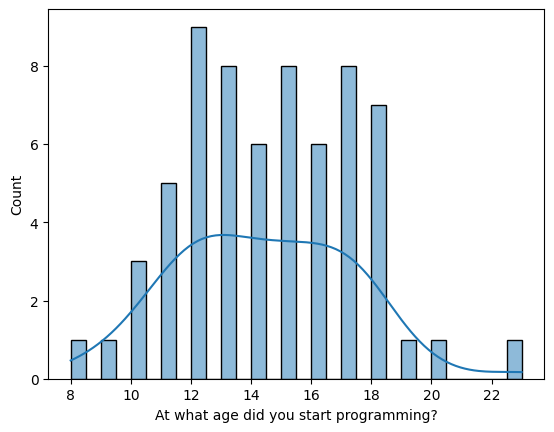

In [65]:

sns.histplot(data=df_raw, x="At what age did you start programming?", bins=30, multiple="stack", kde=True)

In [32]:
df_raw["Major (Check all that apply)"].value_counts()

Major (Check all that apply)
Computer Science                                     55
Math, Computer Science                               14
Data, Government and Politics                         1
Computer Science, Entrepreneurship and Innovation     1
Bioengineering                                        1
Computer Science, Biochemistry                        1
Name: count, dtype: int64

<Axes: xlabel='What was your GPA LAST SEMESTER?', ylabel='Count'>

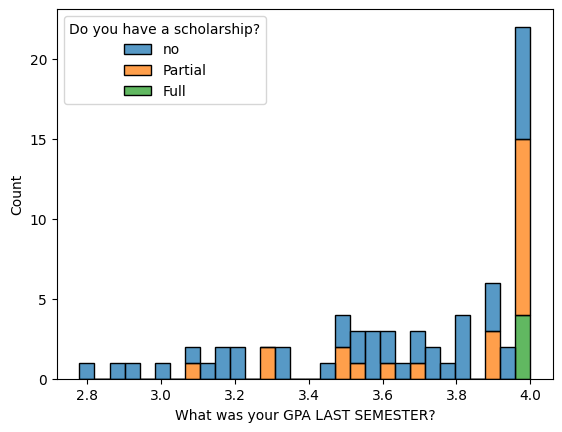

In [33]:
sns.histplot(data=df_raw, x="What was your GPA LAST SEMESTER?", hue='Do you have a scholarship?', bins=30, multiple="stack")

you get scholorship you have good gpa

In [76]:
def classify_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_raw['time_period'] = df_raw['Timestamp'].dt.hour.apply(classify_time_period)

<Axes: >

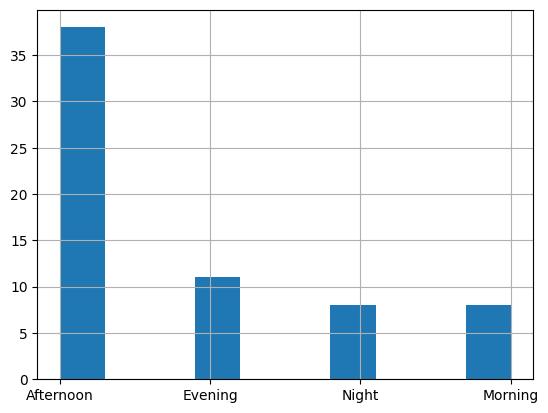

In [77]:
df_raw['time_period'].hist()

In [88]:
cross_tab_2 = pd.crosstab(df_raw["What state are you from?"], df_raw["time_period"])

In [89]:
cross_tab_2

time_period,Afternoon,Evening,Morning,Night
What state are you from?,,,,
CA,5,0,0,0
CT,0,0,0,2
MD,17,7,6,3
NJ,6,1,1,0
NY,0,0,0,1
Non-US,1,1,0,1
PA,2,0,0,1
TX,1,2,0,0
VA,5,0,1,0


In [81]:
df_raw.columns

Index(['Timestamp', 'What state are you from?', 'Major (Check all that apply)',
       'At what age did you start programming?',
       'Have you at any point attended private school?',
       'Do you have a scholarship?', 'Do you have a parent in tech?',
       'Do you study with friends?', 'Do you take notes in classes?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?', 'time_period'],
      dtype='object')